# Import Data & Buat Pivot Awal

In [8]:
# Library dasar
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Untuk menghitung kemiripan trayek
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler


# Load data CSV (ganti sesuai nama file kamu)
df = pd.read_csv('/content/drive/My Drive/DATA SCIENCE/DataPenumpang2021.csv')

# Cek data
df.head()

,periode_data,jenis,kode_trayek,trayek,jumlah_penumpang
0,202101,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,24385
1,202101,Angkutan Umum Integrasi,1R,Senen - Tanah Abang,13518
2,202101,Angkutan Umum Integrasi,1Q,Rempoa - Blok M,29449
3,202101,Angkutan Umum Integrasi,1P,Senen - Bundaran Senayan,8793
4,202101,Angkutan Umum Integrasi,1N,Tanah Abang - Blok M,9987


# Buat Pivot

In [9]:
# Tampilkan dimensi data
print("Jumlah baris dan kolom:", df.shape)


# Cek kolom yang tersedia
print("Kolom-kolom dalam dataset:")
print(df.columns.tolist())

# Lihat data unik dari periode
print("\nPeriode unik:")
print(df['periode_data'].unique())

# Tambahkan kolom tahun dan bulan
df['tahun'] = df['periode_data'].astype(str).str[:4].astype(int)
df['bulan'] = df['periode_data'].astype(str).str[4:].astype(int)

df.head()



Jumlah baris dan kolom: (1473, 5)
Kolom-kolom dalam dataset:
['periode_data', 'jenis', 'kode_trayek', 'trayek', 'jumlah_penumpang']

Periode unik:
[202101 202102 202103 202104 202105 202106 202108 202109 202107 202110
 202111 202112]


,periode_data,jenis,kode_trayek,trayek,jumlah_penumpang,tahun,bulan
0,202101,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,24385,2021,1
1,202101,Angkutan Umum Integrasi,1R,Senen - Tanah Abang,13518,2021,1
2,202101,Angkutan Umum Integrasi,1Q,Rempoa - Blok M,29449,2021,1
3,202101,Angkutan Umum Integrasi,1P,Senen - Bundaran Senayan,8793,2021,1
4,202101,Angkutan Umum Integrasi,1N,Tanah Abang - Blok M,9987,2021,1


# PIVOT DATA

In [10]:
# Pivot agar tiap trayek menjadi baris, tiap bulan jadi kolom
pivot_df = df.pivot_table(
    index='kode_trayek',
    columns='bulan',
    values='jumlah_penumpang',
    aggfunc='sum'  # kalau ada data duplikat, dijumlahkan
)

# Tampilkan hasil awal
pivot_df.head()


bulan,1,2,3,4,5,6,7,8,9,10,11,12
kode_trayek,,,,,,,,,,,,
1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,903783.0,1073929.0,1131439.0
10,356211.0,349572.0,427032.0,424169.0,396760.0,393998.0,175900.0,213453.0,315308.0,369184.0,421487.0,419198.0
10K,41881.0,31243.0,36891.0,34736.0,31667.0,32798.0,23069.0,29478.0,32614.0,34615.0,34498.0,0.0
11,134632.0,134665.0,166555.0,162931.0,154256.0,148933.0,62391.0,74753.0,116020.0,135543.0,148930.0,163776.0
11D,61434.0,47628.0,58186.0,55677.0,51102.0,50089.0,33801.0,40578.0,48895.0,54197.0,59155.0,0.0


# Normalisasi Data

In [11]:
# Inisialisasi scaler
scaler = MinMaxScaler()

# Fit-transform ke data pivot
pivot_normalized = pd.DataFrame(
    scaler.fit_transform(pivot_df),
    index=pivot_df.index,
    columns=pivot_df.columns
)

# Cek hasil awal
pivot_normalized.head()


bulan,1,2,3,4,5,6,7,8,9,10,11,12
kode_trayek,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
10,0.460336,0.435362,0.420226,0.421836,0.423222,0.437858,0.510544,0.461062,0.428610,0.408487,0.392472,0.37050
10K,0.054037,0.036058,0.034354,0.033211,0.033762,0.036448,0.066939,0.063673,0.044333,0.038300,0.032123,0.00000
11,0.173926,0.165788,0.162599,0.161140,0.164533,0.165512,0.181075,0.161468,0.157710,0.149973,0.138678,0.14475
11D,0.079311,0.056611,0.055416,0.054109,0.054494,0.055664,0.098090,0.087649,0.066465,0.059967,0.055083,0.00000


# Hitung Similarity

In [12]:
# Normalisasi udah, sekarang hitung similarity
pivot_normalized = pivot_normalized.fillna(0)
similarity_matrix = cosine_similarity(pivot_normalized)

# Masukin ke DataFrame, biar bisa cek per trayek
similarity_df = pd.DataFrame(similarity_matrix,
                             index=pivot_normalized.index,
                             columns=pivot_normalized.index)

# Contoh: trayek yang mirip sama trayek '1'
similarity_df['1'].sort_values(ascending=False).head(10)


,1
kode_trayek,
1,1.000000
5,0.999078
8,0.998715
4,0.998182
6,0.998159
2,0.998115
13,0.998011
12,0.997915
11,0.997551


# Fungsi Rekomendasi Trayek

In [13]:
def rekomendasikan_trayek(trayek_id, similarity_df, n=5):
    # Mengambil n trayek yang paling mirip berdasarkan cosine similarity
    if trayek_id not in similarity_df.columns:
        print(f"Trayek {trayek_id} tidak ditemukan.")
        return pd.Series()

    return (
        similarity_df[trayek_id]
        .drop(trayek_id)  # Hilangkan diri sendiri
        .sort_values(ascending=False)
        .head(n)
    )


In [14]:
def simpan_grafik_rekomendasi(trayek_utama, daftar_trayek, data_asli, nama_file='rekomendasi_trayek.png'):
    plt.figure(figsize=(12, 6))

    # Trayek utama
    plt.plot(
        data_asli.columns,
        data_asli.loc[trayek_utama],
        label=f'Trayek {trayek_utama} (Utama)',
        linewidth=3,
        color='blue'
    )

    # Trayek rekomendasi
    for trayek_id in daftar_trayek:
        plt.plot(
            data_asli.columns,
            data_asli.loc[trayek_id],
            label=f'Trayek {trayek_id}',
            linestyle='--'
        )

    plt.title('Perbandingan Trayek Utama dan Rekomendasi')
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Penumpang (skala normalisasi)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan grafik ke file
    plt.savefig(nama_file, dpi=300)

    # Tampilkan grafik di layar (ini yang penting!)
    plt.show()

    # Tutup grafik setelah tampil
    plt.close()


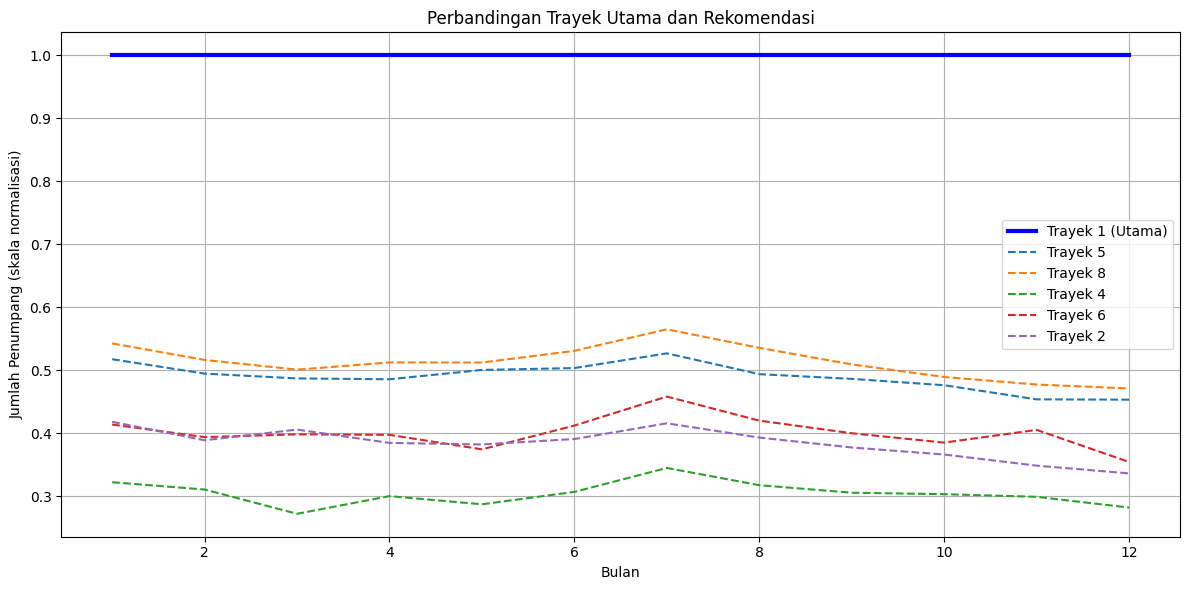

In [16]:
# Hitung rekomendasi untuk trayek '1'
rekomendasi_1 = rekomendasikan_trayek('1', similarity_df, n=5)

simpan_grafik_rekomendasi(
    trayek_utama='1',
    daftar_trayek=rekomendasi_1.index,
    data_asli=pivot_normalized,
    nama_file='rekomendasi_trayek_1.png'
)
